<a href="https://colab.research.google.com/github/shirin1309/Age-and-Gender-Detection/blob/main/age_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

NUM_CLASSES = 8

CHANNELS = 3

IMAGE_RESIZE = 96

NUM_EPOCHS = 50

STEPS_PER_EPOCH_TRAINING = 52
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 199
BATCH_SIZE_VALIDATION = 52

BATCH_SIZE_TESTING = 1



In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers




from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/shirin_age_model/dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/shirin_age_model/dataset/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 



Found 10436 images belonging to 8 classes.
Found 2400 images belonging to 8 classes.


In [11]:
def conv_pool_cnn(dim=224,freeze_layers=10,full_freeze='N'):

  model = ResNet50(include_top=False)
  model.summary()
  x = model.output
  x = GlobalAveragePooling2D()(x)
  
  model = Model(inputs = model.input,outputs=x)
  
  model_final = Sequential()
  model_final.add(model)
  
  model_final.add(Dense(2048))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(1024))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(512))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
  
  model_final.add(Dense(256))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
    
  model_final.add(Dense(128))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))

  model_final.add(Dense(8,activation='softmax'))
  
  model_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  if full_freeze != 'N':
    for layer in model.layers[0:freeze_layers]:
      layer.trainable = False
  model_final.summary()
  return model_final


In [12]:
model = conv_pool_cnn()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                          

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('/content/drive/MyDrive/models/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        callbacks=[checkpoint],
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
52/52 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.7084
Epoch 1: val_loss improved from inf to 1.41173, saving model to /content/drive/MyDrive/models/model-001-0.708411-0.528846.h5
52/52 [==============================] - 93s 2s/step - loss: 0.8222 - accuracy: 0.7084 - val_loss: 1.4117 - val_accuracy: 0.5288
Epoch 2/50
52/52 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.7790
Epoch 2: val_loss did not improve from 1.41173
52/52 [==============================] - 80s 2s/step - loss: 0.6490 - accuracy: 0.7790 - val_loss: 1.4771 - val_accuracy: 0.5096
Epoch 3/50
52/52 [==============================] - ETA: 0s - loss: 0.5038 - accuracy: 0.8305
Epoch 3: val_loss did not improve from 1.41173
52/52 [==============================] - 65s 1s/step - loss: 0.5038 - accuracy: 0.8305 - val_loss: 2.9647 - val_accuracy: 0.4654
Epoch 4/50
52/52 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.8707
Epoch 4: val_loss 

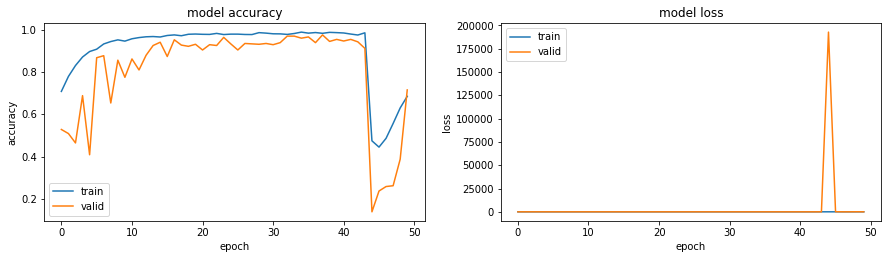

In [18]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.savefig("acc1.png")
#plt.show()



In [20]:
test_generator = data_generator.flow_from_directory(
    directory = '/content/drive/MyDrive/shirin_age_model/dataset/valid',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

Found 2400 images belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


2400/2400 [==============================] - 26s 10ms/step
[0 0 0 ... 7 7 7]


In [25]:
from tensorflow.keras.models import load_model
modi=load_model('/content/drive/MyDrive/models/model-007-0.932304-0.876923.h5')

In [48]:
from keras.models import load_model
import cv2
import numpy as np

model = modi

#model.compile(loss='categorical_crossentropy',
            #  optimizer='adam',
            #  metrics=['accuracy'])

img = cv2.imread('/content/gadiz33.jpg')
img = cv2.resize(img,(96,96))
img = np.reshape(img,[1,96,96,3])

#classes = model.predict_classes(img)
gen=model.predict(img)
gen_ind=np.argmax(gen)
print(gen_ind)
#print(classes)
#gender_bucket=['female','male']
#print(gender_bucket[gen_ind])

3


In [41]:
print(train_generator.class_indices)

{'age_0_2': 0, 'age_15_20': 1, 'age_25_32': 2, 'age_34_48': 3, 'age_49_58': 4, 'age_4_6': 5, 'age_60_100': 6, 'age_8_12': 7}
